# NLP with Disaster Tweets

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
#sns.color_palette("hls", 8)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
Id = test.id

In [ ]:
train.shape #there are 7613 rows and 5 columns in the data

(7613, 5)

In [ ]:
train.head() # 1 is real disaster tweets 0 is fake ones

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
len(set(train['id'])) # There are 7613 unique users. Each tweet was tweeted by unique users

7613

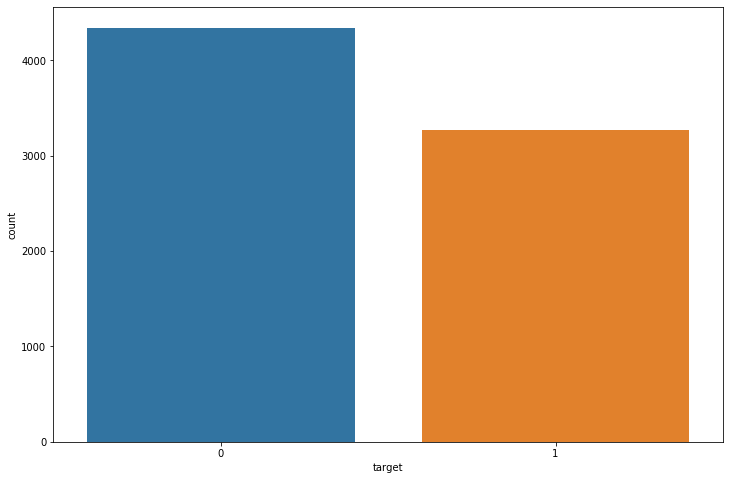

0    4342
1    3271
Name: target, dtype: int64


In [ ]:
sns.countplot(train['target'])
plt.show()
print(train['target'].value_counts())

# Keywords

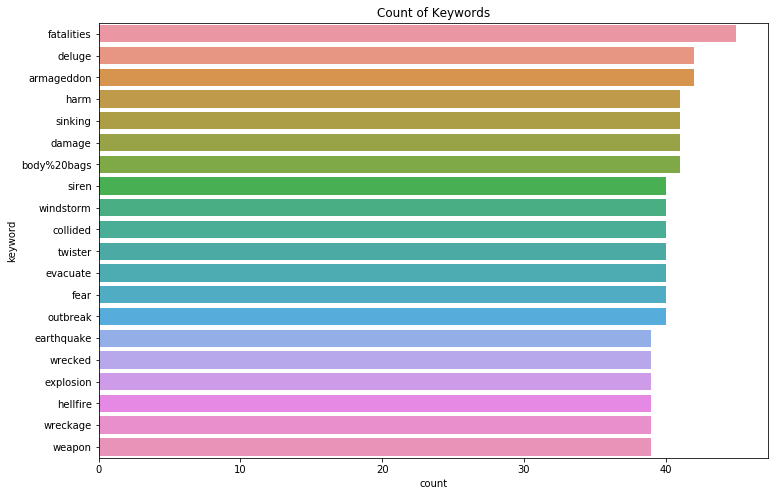

In [ ]:
sns.countplot(y = train.keyword,order = train['keyword'].value_counts().sort_values(ascending=False).iloc[0:20].index)
plt.title("Count of Keywords")
plt.show() # It shows the most usage keywords 

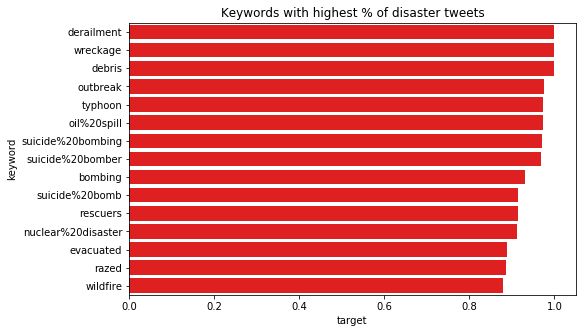

In [ ]:
# Count of keywords for real disaster;
disastered_tweet = train.groupby('keyword')['target'].mean().sort_values(ascending=False).head(15)
non_disasterd  = train.groupby('keyword')['target'].mean().sort_values().head(15)

plt.figure(figsize=(8,5))
sns.barplot(disastered_tweet, disastered_tweet.index, color='red')
plt.title('Keywords with highest % of disaster tweets')
plt.show()

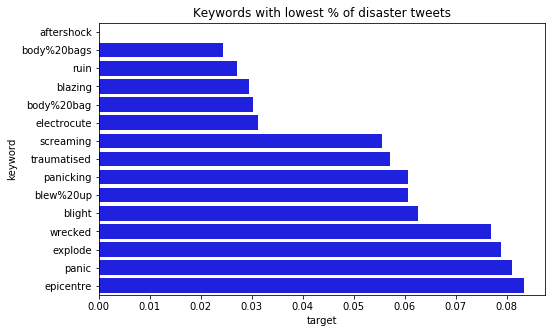

In [ ]:
#Count of eywords for Non-Disasters
plt.figure(figsize=(8,5))
sns.barplot(non_disasterd, non_disasterd.index, color='blue')
plt.title('Keywords with lowest % of disaster tweets')
plt.show()

# Locations

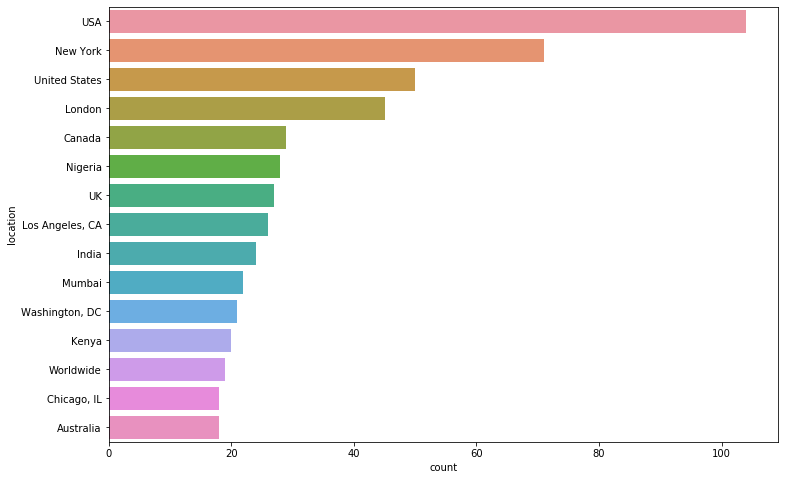

In [ ]:
sns.countplot(y = train.location,order = train['location'].value_counts().sort_values(ascending=False).iloc[0:15].index)

* As you can see the data is not clean. We need to do data cleansing. For example Us,USA and United State are same location.We need to seperate them 

* Let's see which location has the most disaster tweets

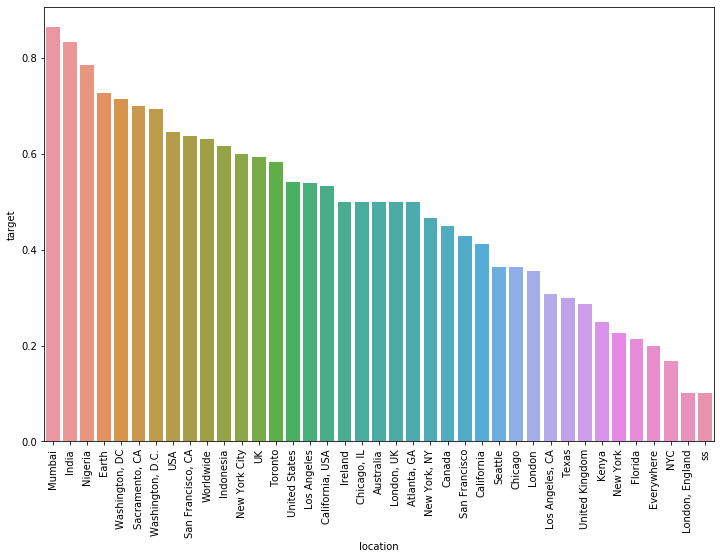

In [ ]:
raw_loc = train.location.value_counts()
top_loc_disaster = list(raw_loc[raw_loc>=10].index)
top_only_disaster = train[train.location.isin(top_loc_disaster)]

top_location = top_only_disaster.groupby('location')['target'].mean().sort_values(ascending=False)
sns.barplot(x=top_location.index, y=top_location)
plt.xticks(rotation=90)
plt.show()

* Mumbai and India have the most disaster tweets. But we can see, there lots of noise in the location feature. We need to fix that 

In [ ]:
# We need to fill null values with None
for i in ['keyword','location']:
    train[i] = train[i].fillna('None')
    test[i] = test[i].fillna('None')
    

In [ ]:
train.info() #As we can see there is no null value now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7613 non-null object
location    7613 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
len(set(train['location'])) #There are 3342 unique location values. we are going to decrease of that numbers as using data cleaning

3342

In [ ]:
def clean_location(x):
    if x == 'None':
        return 'None'
    elif x == 'Earth' or x =='Worldwide' or x == 'Everywhere':
        return 'World'
    elif 'New York' in x or 'NYC' in x:
        return 'New York'    
    elif 'London' in x:
        return 'London'
    elif 'Mumbai' in x:
        return 'Mumbai'
    elif 'Washington' in x and 'D' in x and 'C' in x:
        return 'Washington DC'
    elif 'San Francisco' in x:
        return 'San Francisco'
    elif 'Los Angeles' in x:
        return 'Los Angeles'
    elif 'Seattle' in x:
        return 'Seattle'
    elif 'Chicago' in x:
        return 'Chicago'
    elif 'Toronto' in x:
        return 'Toronto'
    elif 'Sacramento' in x:
        return 'Sacramento'
    elif 'Atlanta' in x:
        return 'Atlanta'
    elif 'California' in x:
        return 'California'
    elif 'Florida' in x:
        return 'Florida'
    elif 'Texas' in x:
        return 'Texas'
    elif 'United States' in x or 'USA' in x:
        return 'USA'
    elif 'United Kingdom' in x or 'UK' in x or 'Britain' in x:
        return 'UK'
    elif 'Canada' in x:
        return 'Canada'
    elif 'India' in x:
        return 'India'
    elif 'Kenya' in x:
        return 'Kenya'
    elif 'Nigeria' in x:
        return 'Nigeria'
    elif 'Australia' in x:
        return 'Australia'
    elif 'Indonesia' in x:
        return 'Indonesia'
    elif x in top_location:
        return x
    else: 
        return 'Others'
    
train['location'] = train['location'].apply(lambda x: clean_location(str(x)))
test['location'] = test['location'].apply(lambda x: clean_location(str(x)))

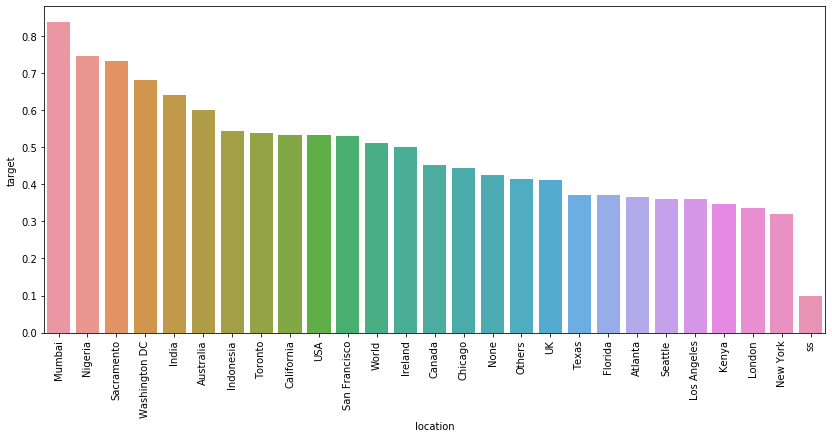

In [ ]:
top_location = train.groupby('location')['target'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_location.index, y=top_location)
plt.xticks(rotation=90)
plt.show()

* It looks, the data clean anymore. Now, Mumbai and Nigeria have the most disasters tweets.

In [ ]:
len(set(train['location'])) # As we can see, the unique values decreased. It has 27 now.

27

# Text

In [ ]:
# Let's look at the rondom tweets. 
train['text'][0]

# As wee can see there is a hashtag(#) in that tweet. We can split the hashtag and can use as a new feature
# let's look at another random tweet 

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
train['text'][789] 

# There is a tagged in that tweet. We can also split thatn and we can use as a new feature


'@todd_calfee so @mattburgener wanted to see that info on blight u got'

In [ ]:
train['text'][417] # and in that tweet. there is a link.  we are gonna fix all those tweets

'Arson suspect linked to 30 fires caught in Northern California http://t.co/mmGsyAHDzb'

In [ ]:
import re

# We are going to split the hashtag,link and tagged
def created_feature(train):
    train['hashtags'] = train['text'].apply(lambda x: " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", x)]) or 'no_hashtag')
    train['tagged'] = train['text'].apply(lambda x: " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+", x)]) or 'no_tagged')
    train['link'] = train['text'].apply(lambda x:" ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", x)]) or 'no_link')
    return train

In [ ]:
train = created_feature(train)
test = created_feature(test)

In [ ]:
train # As we can see, we have new features now. Great!

,id,keyword,location,text,target,hashtags,tagged,link
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,earthquake,no_tagged,no_link
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,no_hashtag,no_tagged,no_link
2,5,None,None,All residents asked to 'shelter in place' are ...,1,no_hashtag,no_tagged,no_link
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,wildfires,no_tagged,no_link
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,Alaska wildfires,no_tagged,no_link
5,8,None,None,#RockyFire Update => California Hwy. 20 closed...,1,RockyFire CAfire wildfires,no_tagged,no_link
6,10,None,None,#flood #disaster Heavy rain causes flash flood...,1,flood disaster,no_tagged,no_link
7,13,None,None,I'm on top of the hill and I can see a fire in...,1,no_hashtag,no_tagged,no_link
8,14,None,None,There's an emergency evacuation happening now ...,1,no_hashtag,no_tagged,no_link
9,15,None,None,I'm afraid that the tornado is coming to our a...,1,no_hashtag,no_tagged,no_link


In [ ]:
train['hashtags'].value_counts().sort_values(ascending=False).iloc[0:10]

no_hashtag                              5870
hot prebreak best                         30
GBBO                                      11
news                                       9
Beyhive                                    8
Directioners                               8
Hiroshima                                  8
Dubstep TrapMusic DnB EDM Dance Ices       7
islam                                      7
animalrescue                               7
Name: hashtags, dtype: int64

In [ ]:
train['tagged'].value_counts().sort_values(ascending=False).iloc[0:10]

no_tagged        5604
YouTube            60
Change              9
djicemoon           7
POTUS               6
emmerdale           5
usatoday            5
ViralSpell          5
worldnetdaily       4
Reuters             4
Name: tagged, dtype: int64

In [ ]:
train['link'].value_counts().sort_values(ascending=False).iloc[0:10]

no_link                                          3642
http://t.co/qew4c5M1xd                              9
http://t.co/KSAwlYuX02                              6
http://t.co/q2eBlOKeVE http://t.co/eNCmhz6y34       6
http://t.co/cybKsXHF7d                              5
https://t.co/moLL5vd8yD                             4
http://t.co/LvlH3W3aWO http://t.co/vIwXY1XDYK       4
http://t.co/nnMQlz91o9 http://t.co/o91f3cYy0R       4
http://t.co/thoYhrHkfJ http://t.co/WvJ39a3BGM       4
https://t.co/rqWuoy1fm4                             4
Name: link, dtype: int64

In [ ]:
def clean_text(text):
    text = re.sub(r'https?://\S+', '', text) # remove links
    text = re.sub(r'\n',' ', text) #  remove breaks
    text = re.sub('\s+', ' ', text).strip() 
    return text

In [ ]:
train['text'][417] # Let's look at that sample

'Arson suspect linked to 30 fires caught in Northern California http://t.co/mmGsyAHDzb'

In [ ]:
clean_text(train['text'][417]) # as we can see we cleaned the tweet
# We are gonna use of that method for all text 

'Arson suspect linked to 30 fires caught in Northern California'

In [ ]:
train['text'] = train['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))

In [ ]:
train.head()

,id,keyword,location,text,target,hashtags,tagged,link
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,earthquake,no_tagged,no_link
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,no_hashtag,no_tagged,no_link
2,5,None,None,All residents asked to 'shelter in place' are ...,1,no_hashtag,no_tagged,no_link
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,wildfires,no_tagged,no_link
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,Alaska wildfires,no_tagged,no_link


In [ ]:
## Text Mining
import nltk
nltk.download("stopwords")
!pip install textblob
nltk.download("wordnet")

#Upper lower convert
train['text'] = train['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
test['text'] = test['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))

# punctuation marks
train['text'] =train['text'].str.replace('[^\w\s]','')
test['text'] =test['text'].str.replace('[^\w\s]','')

# numbers
train['text'] = train['text'].str.replace('[\d]','')
test['text'] = test['text'].str.replace('[\d]','')

from nltk.corpus import stopwords
sw = stopwords.words('english')
train['text'] =train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
test['text'] =test['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi 
from textblob import Word
train['text'] = train['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test['text'] = test['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


train['text'] = train['text'].str.replace('rt','')
test['text'] = test['text'].str.replace('rt','')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SPTAOS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SPTAOS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [ ]:
train.text # we did some cleaning to text 

0                deed reason eahquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident asked shelter place notified officer ...
3       people receive wildfire evacuation order calif...
4       got sent photo ruby alaska smoke wildfire pour...
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    aria_ahrary thetawniest control wild fire cali...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest home razed nohern california wildfire a...
Name: text, Length: 7613, dtype: object

In [ ]:
freq_df = train['text'].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
freq_df.columns = ['words', 'frequences']
freq_df.sort_values('frequences',ascending=False) # It shows frequences of words 

,words,frequences
11,fire,350.0
124,like,347.0
308,amp,300.0
58,im,299.0
223,get,255.0
6,u,254.0
153,new,224.0
719,via,220.0
578,one,204.0
26,people,199.0


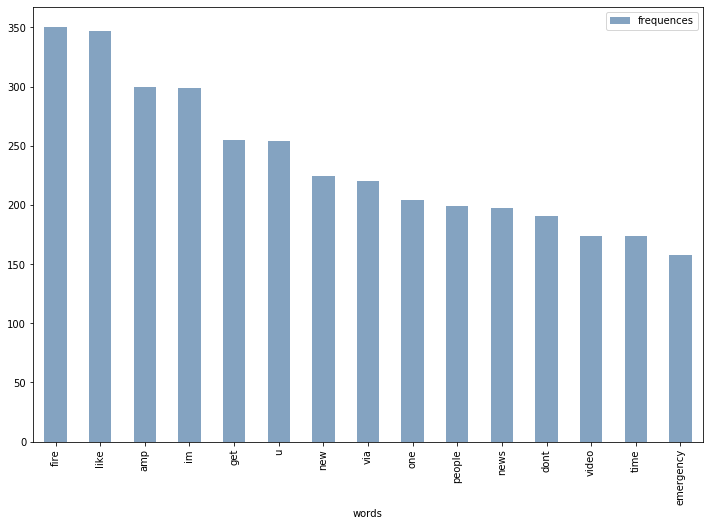

In [ ]:
# Most used words
top_freq = freq_df.sort_values('frequences',ascending=False)[0:15]
top_freq.set_index('words',inplace=True)
top_freq.plot.bar(color=(0.2, 0.4, 0.6, 0.6))

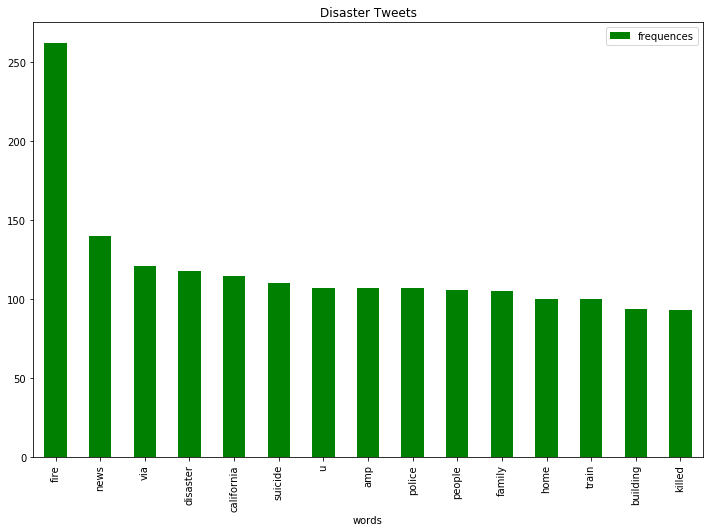

In [ ]:
#Most used words dor disasters
freq_df = train[train['target']==1]['text'].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
freq_df.columns = ['words', 'frequences']
freq_df.sort_values('frequences',ascending=False)

top_freq_disaster = freq_df.sort_values('frequences',ascending=False)[0:15]
top_freq_disaster.set_index('words',inplace=True)
top_freq_disaster.plot.bar(color ='g')
plt.title("Disaster Tweets")
plt.show()  #Fire and news are most used words in the disasters tweets.

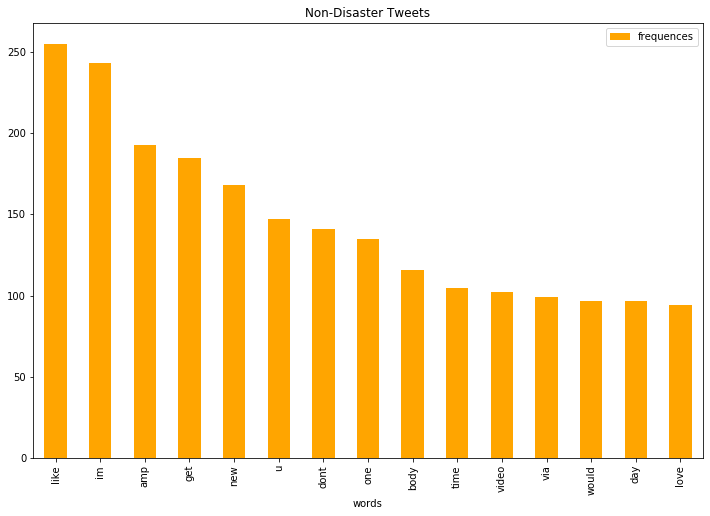

In [ ]:
# Most used words for Non-Disaster tweets
freq_df = train[train['target']==0]['text'].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
freq_df.columns = ['words', 'frequences']
freq_df.sort_values('frequences',ascending=False)

top_freq_non_disaster = freq_df.sort_values('frequences',ascending=False)[0:15]
top_freq_non_disaster.set_index('words',inplace=True)
top_freq_non_disaster.plot.bar(color ='orange')
plt.title("Non-Disaster Tweets")
plt.show() #

In [ ]:
!pip install wordcloud
import sys
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator

In [ ]:
# I'm keeping the all tweets in ne text to do word cloud

text = " ".join(i for i in train.text)

In [ ]:
text[0:1000] 

'deed reason eahquake may allah forgive u forest fire near la ronge sask canada resident asked shelter place notified officer evacuation shelter place order expected people receive wildfire evacuation order california got sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy closed direction due lake county fire cafire wildfire flood disaster heavy rain cause flash flooding street manitou colorado spring area im top hill see fire wood there emergency evacuation happening building across street im afraid tornado coming area three people died heat wave far haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding raining flooding florida tampabay tampa day ive lost count flood bago myanmar arrived bago damage school bus multi car crash breaking whats man love fruit summer lovely car fast goooooooaaaaaal ridiculous london cool love skiing wonderful day looooool wayi cant eat shit nyc last week love girlfriend cooool like pasta

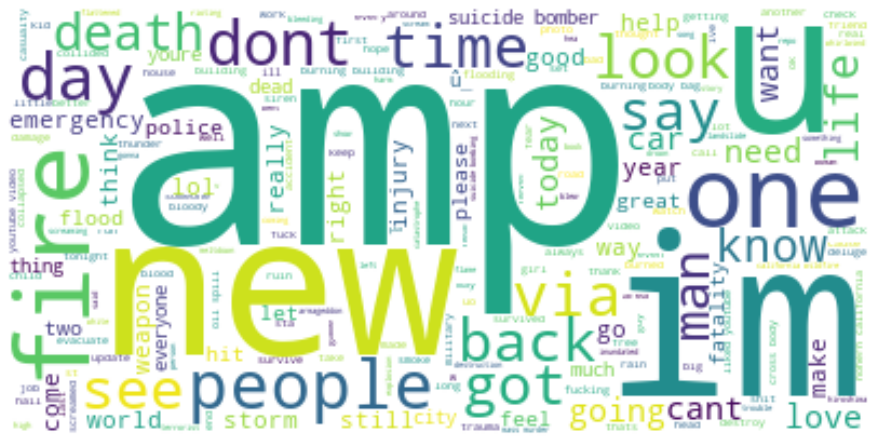

In [ ]:
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Feature Engineering

* count vectors
* TF-IDF vectors(words, chracters, n-grams)


TF (t) = (Frequency of a term in a document) / (total number of terms in a document)

IDF (t) = log_e (Total number of documents) / (number of documents with t terms in it)

In [ ]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

# Count Vectors

In [ ]:
!pip install category_encoders
import category_encoders as ce

# Target encoding
features = ['keyword', 'location']
encoder = ce.TargetEncoder(cols=features)
encoder.fit(train[features],train['target'])

train = train.join(encoder.transform(train[features]).add_suffix('_target'))
test = test.join(encoder.transform(test[features]).add_suffix('_target'))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer

# Links
vec_links = CountVectorizer(min_df = 5, analyzer = 'word', token_pattern = r'https?://\S+') # Only include those >=5 occurrences
link_vec = vec_links.fit_transform(train['link'])
link_vec_test = vec_links.transform(test['link'])
X_train_link = pd.DataFrame(link_vec.toarray(), columns=vec_links.get_feature_names())
X_test_link = pd.DataFrame(link_vec_test.toarray(), columns=vec_links.get_feature_names())

# Tagged
vec_tag = CountVectorizer(min_df = 5)
tag_vec = vec_tag.fit_transform(train['tagged'])
tag_vec_test = vec_tag.transform(test['tagged'])
X_train_tag = pd.DataFrame(tag_vec.toarray(), columns=vec_tag.get_feature_names())
X_test_tag = pd.DataFrame(tag_vec_test.toarray(), columns=vec_tag.get_feature_names())

# Hashtags
vec_hash = CountVectorizer(min_df = 5)
hash_vec = vec_hash.fit_transform(train['hashtags'])
hash_vec_test = vec_hash.transform(test['hashtags'])
X_train_hash = pd.DataFrame(hash_vec.toarray(), columns=vec_hash.get_feature_names())
X_test_hash = pd.DataFrame(hash_vec_test.toarray(), columns=vec_hash.get_feature_names())

# TF-IDF

In [ ]:
# Tf-idf for text
from sklearn.feature_extraction.text import TfidfVectorizer

vec_text = TfidfVectorizer(min_df = 10, ngram_range = (1,2), stop_words='english') 
text_vec = vec_text.fit_transform(train['text'])
text_vec_test = vec_text.transform(test['text'])
X_train_text = pd.DataFrame(text_vec.toarray(), columns=vec_text.get_feature_names())
X_test_text = pd.DataFrame(text_vec_test.toarray(), columns=vec_text.get_feature_names())
print (X_train_text.shape)

(7613, 1567)


In [ ]:
train = train.join(X_train_link, rsuffix='_link')
train = train.join(X_train_tag, rsuffix='_tagged')
train = train.join(X_train_hash, rsuffix='_hashtag')
train = train.join(X_train_text, rsuffix='_text')

test = test.join(X_test_link, rsuffix='_link')
test = test.join(X_test_tag, rsuffix='_mention')
test = test.join(X_test_hash, rsuffix='_hashtag')
test = test.join(X_test_text, rsuffix='_text')

print (train.shape)

(7613, 1708)


In [ ]:
train.head() # as we can see the data has 1708 feature now

,id,keyword,location,text,target,hashtags,tagged,link,keyword_target,location_target,...,youtube video,yr,yr old,yyc_text,zone,û_,ûïwhen,ûïwhen saw,ûò,ûó
0,1,None,None,deed reason eahquake may allah forgive u,1,earthquake,no_tagged,no_link,0.688525,0.424398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,None,None,forest fire near la ronge sask canada,1,no_hashtag,no_tagged,no_link,0.688525,0.424398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,None,None,resident asked shelter place notified officer ...,1,no_hashtag,no_tagged,no_link,0.688525,0.424398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,None,None,people receive wildfire evacuation order calif...,1,wildfires,no_tagged,no_link,0.688525,0.424398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,None,None,got sent photo ruby alaska smoke wildfire pour...,1,Alaska wildfires,no_tagged,no_link,0.688525,0.424398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train.drop(columns = ['id', 'keyword', 'location', 'text', 
                                                                       'target', 'hashtags', 'tagged','link']),
                                                 train['target'],test_size = 0.3) 


In [ ]:
train_x.shape

(5329, 1700)

In [ ]:
test_x.shape

(2284, 1700)

# Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
log = linear_model.LogisticRegression(solver='liblinear', random_state=777)
log_model = log.fit(train_x, train_y)
log_pred = log.predict(test_x)
accuracy = model_selection.cross_val_score(log_model,
                                          test_x,
                                          test_y,
                                          cv=10).mean()

print('Accuracy of Logistic Regression: ', accuracy)

Accuracy of Logistic Regression:  0.7859143559416017


In [ ]:
confusion_matrix(test_y,log_pred)

array([[1123,  176],
       [ 271,  714]], dtype=int64)

# Navie-Bayes 

In [ ]:
nb= naive_bayes.MultinomialNB()
nb_model = nb.fit(train_x, train_y)
nb_pred = nb_model.predict(test_x)
accuracy = model_selection.cross_val_score(nb_model,
                                          test_x,
                                          test_y,
                                          cv=10).mean()
print('Accuracy of Naive-Bayes: ', accuracy)

Accuracy of Naive-Bayes:  0.7740740478246768


In [ ]:
confusion_matrix(test_y,nb_pred)

array([[1172,  127],
       [ 323,  662]], dtype=int64)

# Random Forest Regression

In [ ]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(train_x,train_y)
rf_pred = rf.predict(test_x)
accuracy = model_selection.cross_val_score(rf_model,
                                          test_x,
                                          test_y,
                                          cv=10).mean()
print('Accuracy of Random Forest: ', accuracy)

C:\Users\SPTAOS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest:  0.7556970294944603


In [ ]:
confusion_matrix(test_y,rf_pred) 

array([[1104,  195],
       [ 341,  644]], dtype=int64)

# XGBoost

In [ ]:
!pip install xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(train_x,train_y)
xgb_pred = xgb_model.predict(test_x)
accuracy = model_selection.cross_val_score(xgb_model,
                                          test_x,
                                          test_y,
                                          cv=10).mean()
print('Accuracy of XGBoost: ', accuracy)

C:\Users\SPTAOS\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SPTAOS\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
confusion_matrix(test_y,xgb_pred)

array([[1116,  183],
       [ 302,  683]], dtype=int64)

# Submission

In [ ]:
columns = train_x.columns

In [ ]:
columns

In [ ]:
test = test.reindex(columns = columns, fill_value=0)

In [ ]:
pred = log.predict(test)
submission = pd.DataFrame({"id": Id, "target": pred})
submission.to_csv("submission.csv", index=False)

* Logistic Regression is the best

If you like it please vote !